<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/jdecorte/ai_ml/blob/main/solutions/031-exercise_heart_disease_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [25]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"

import pandas as pd                                 # Data Frame

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

*   age: age in year
*   sex: 1 = male + O = female
*   cp: chest pain type
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: resting electrocardiographic results
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak:  ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment
*   ca: number of major vessels (0-3) colored by flourosopy
*   thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
*   target: 0 = no disease + 1 = disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/ai_ml/main/datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Get general info about the dataset. Are there any values missing?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are 2 values for target (0 and 1), so this is a binary classification.   
Before we can start the classification, we have to know if this is a skewed dataset.

In [29]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

What is X and what is y?

In [30]:
X_pre_transform = df.drop("target", axis = 1)
y = df['target']    

Use min-max scaling on X.  

In [31]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_tr = min_max_scaler.fit_transform(X_pre_transform)

Put the transformed data back into a dataframe.  
Take a look at the data in the dataframe.

In [32]:
X_transform = pd.DataFrame(X_tr, columns=X_pre_transform.columns)
X_transform.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


What is X_train, y_train, X_test, y_test?

In [33]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, random_state=42)    # default test size = 0.25

What is the number of records in X_train en X_test?

In [34]:
print(f"The number of records in X_train is: {len(X_train)}")
print(f"The number of records in X_test is: {len(X_test)}")

The number of records in X_train is: 768
The number of records in X_test is: 257


Use the SGD classifier to do the classification.  
Make sure the results are reproducible.

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [36]:
y_predict = sgd_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7704280155642024


Use K-fold cross-validation to determine the accuracy of the model. 

Give the confusion matrix.

In [38]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[289  78]
 [ 39 362]]


Visualize the confusion matrix

Text(91.68, 0.5, 'Actual class')

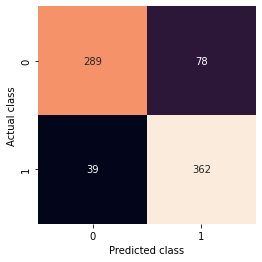

In [39]:
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

Give the number of True Negatives, True Positives, False Positives, False Negatives.  
TN = 289   
FN = 39    
FP = 78   
TP = 362

In [40]:
TN = conf_mx[0][0]
FN = conf_mx[1][0]
FP = conf_mx[0][1]
TP = conf_mx[1][1]

print(f"TN = {TN} \nFN = {FN} \nFP = {FP} \nTP = {TP}")

TN = 289 
FN = 39 
FP = 78 
TP = 362


What is worse in this case: False Positives or False Negatives?

Calculate the precision and the recall using the above values.  

In [41]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")

The precision is: 0.8227272727272728
The recall is: 0.9027431421446384


Calculate the precision and recall using sklearn  
The precision is: 0.8227272727272728  
The recall is: 0.9027431421446384

In [42]:
from sklearn.metrics import precision_score, recall_score
print(f"The precision is: {precision_score(y_train, y_train_pred)}")
print(f"The recall is: {recall_score(y_train, y_train_pred)}")

The precision is: 0.8227272727272728
The recall is: 0.9027431421446384


What is meant with precision and recall in this context?

precision: aandeel van al degenen waarvan we zeggen dat ze een hartziekte zullen krijgen, die er ook effectief een hebben.   
recall: aandeel van alle mensen met hartziekte die we ook effectief detecteren. 

Calculate F1 score using the above values.  
F1 is: 0.8608799048751486


In [43]:
f1 = 2 / (1/precision + 1/recall)
print(f"F1 is: {f1}")

F1 is: 0.8608799048751486


Calculate F1 score using the sklearn.  
F1 is: 0.8608799048751486

In [44]:
from sklearn.metrics import f1_score
print(f"F1 is: {f1_score(y_train, y_train_pred)}")

F1 is: 0.8608799048751486


Perhaps it's a good idea to use another classifier?  
Use a RandomForestClassifier to make predictions.

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)  # default 100 tree (n_estimators=100)

Show the confusion matrix

In [46]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[353  14]
 [ 12 389]]


Calculate precision, recall and F1-score and compare to the SGDClassifier


In [47]:
print(f"The precision is: {precision_score(y_train, y_train_pred)}")
print(f"The recall is: {recall_score(y_train, y_train_pred)}")
print(f"F1 is: {f1_score(y_train, y_train_pred)}")


The precision is: 0.9652605459057072
The recall is: 0.970074812967581
F1 is: 0.9676616915422885


Calculate the accuracy on the testset

In [48]:
forest_clf.fit(X_train,y_train)
y_predict = forest_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"The accuracy on the test set is: {accuracy_score(y_test, y_predict)}")

The accuracy on the test set is: 1.0
